In [2]:
import numpy as np
import matplotlib.pylab as plt
import padasip as pa

np.random.seed(42069) # always use the same random seed to make results comparable

d.shape = (500,), v.shape = (500,), x.shape = (500, 4)


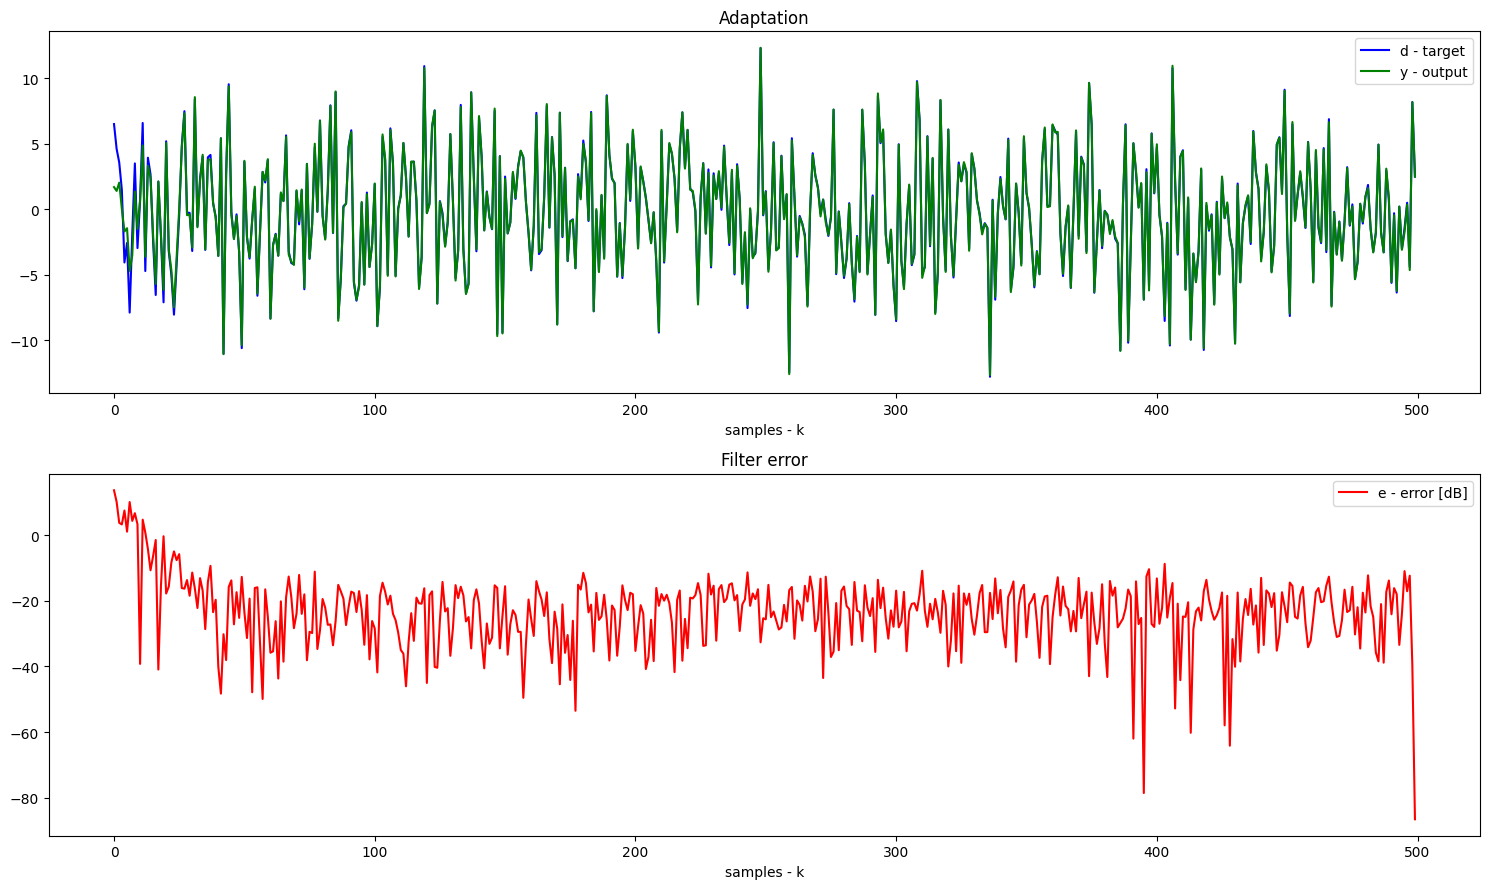

In [15]:
# creation of data
N = 500
x = np.random.normal(0, 1, (N, 4)) # input matrix
v = np.random.normal(0, 0.1, N) # noise
d = 2*x[:,0] + 0.1*x[:,1] - 4*x[:,2] + 0.5*x[:,3] + v # target

print(f"d.shape = {d.shape}, v.shape = {v.shape}, x.shape = {x.shape}")

# identification
f = pa.filters.FilterLMS(n=4, mu=0.1, w="random")
y, e, w = f.run(d, x)

# show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(d,"b", label="d - target")
plt.plot(y,"g", label="y - output");plt.legend()
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(10*np.log10(e**2),"r", label="e - error [dB]");plt.legend()
plt.tight_layout()
plt.show()

In [6]:
ecg = np.loadtxt('./data/ecg.dat')
n_samples = ecg.shape[0]
Fs = 500 # sampling frequency in Hz
nyquist = Fs / 2 # Nyquist frequency in Hz
powerline_freq = 49.56 # Hz

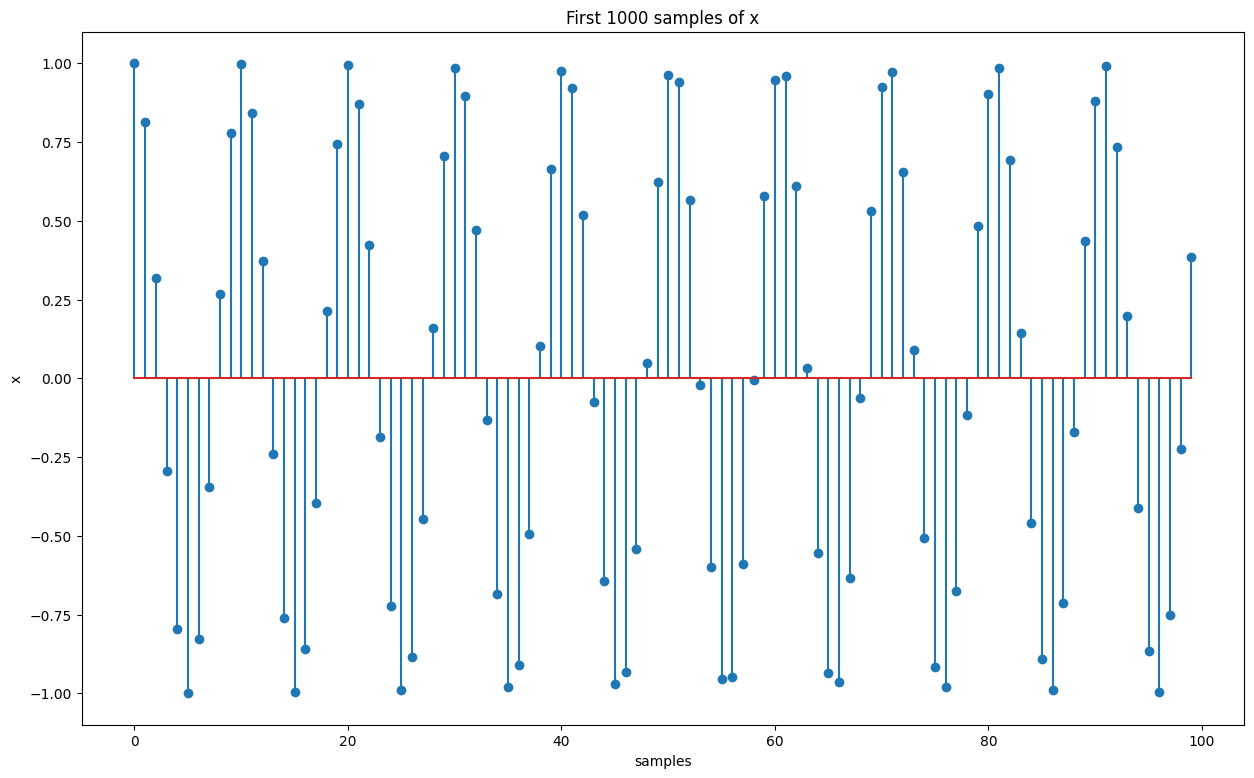

In [17]:

x = np.cos(2 * np.pi * powerline_freq / Fs * np.arange(n_samples))

# plot the first 1000 samples of x
plt.figure(figsize=(15,9))
plt.stem(x[:100])
plt.xlabel('samples')
plt.ylabel('x')
plt.title('First 1000 samples of x')
plt.show()



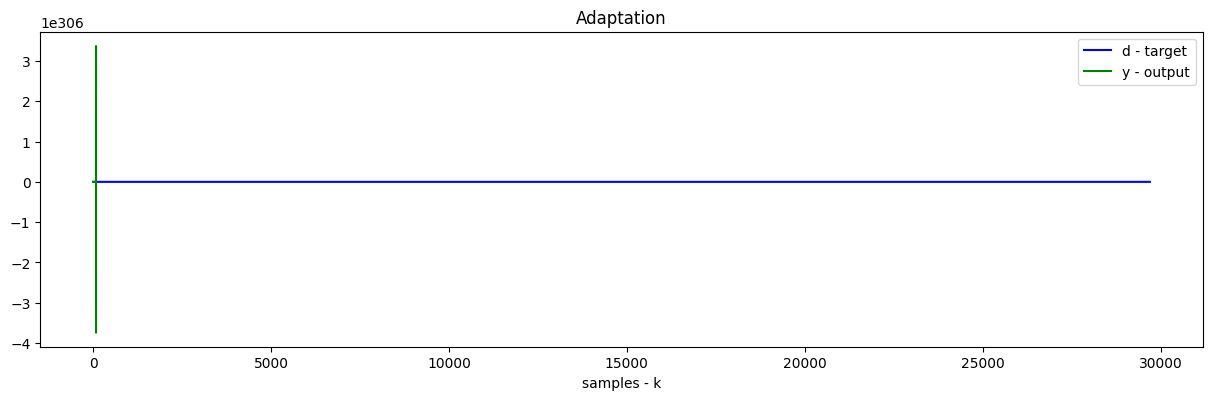

In [24]:


 
n_taps = 2
mu = 0.0001
filter = pa.filters.FilterLMS(n=n_taps, mu=mu, w="random")

# https://matousc89.github.io/padasip/sources/preprocess/input_from_history.html#preprocess-input-from-history
ecg_preprocessed = pa.input_from_history(ecg, n_taps)

y, e, w = filter.run(x[:-1], ecg_preprocessed)

# show results

plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(ecg,"b", label="d - target")
plt.plot(y,"g", label="y - output");plt.legend()

